In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [111]:
#Reading input data

#dataset with nulls dropped
# new = pd.read_csv('pred/final-new.csv')
data = pd.read_csv('pred/final-noshift.csv')

In [112]:
#Extracting inputs and outputs

y = data[['PM25']]
X = data.drop(['PM25'], axis=1)

# y_new = new[['PM25']]
# X_new = new.drop(['PM25'], axis=1)

In [113]:
X.shape

(11781, 45)

In [114]:
#Splitting into test and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [115]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [116]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)
# lin_pred = regr.predict(X_new)

In [118]:
linear_regression_score = regr.score(X_test, y_test)
# linear_regression_score = regr.score(X_new, y_new)
linear_regression_score

0.3759379693179852

In [119]:
from math import sqrt
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
RMSE = []
MAE = []
R2 = [] 
xlabels = []
xlabels.append("Linear Regression")
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
RMSE.append(sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
MAE.append(mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))
R2.append(r2_score(y_test, lin_pred))

Root mean squared error: 8.43
Mean absolute error: 5.65
R-squared: 0.38


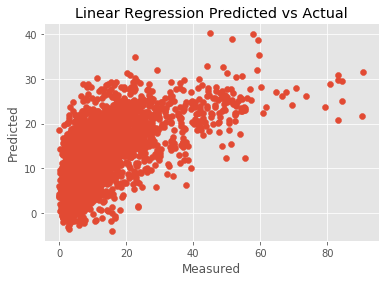

In [120]:
#plots to be moved to data visualisation notebook
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [121]:
#Neural Net Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [122]:
# Train the model using the training sets
mlp.fit(X_train, y_train.values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.541446134448345

In [124]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [125]:
# The mean squared error
xlabels.append("NNR")
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
RMSE.append(sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
MAE.append(mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))
R2.append(r2_score(y_test, nnr_pred))

Root mean squared error: 7.22
Mean absolute error: 5.04
R-squared: 0.54


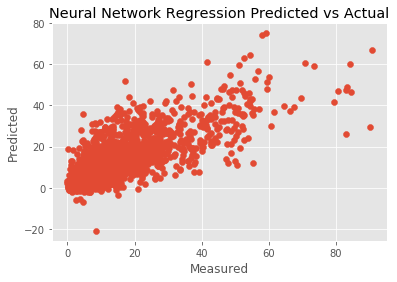

In [126]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [127]:
#XGBoost
import xgboost as xgb
#Fitting XGB regressor 
xboost = xgb.XGBRegressor(n_estimators=200)

In [128]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [129]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.6610362514808814

In [130]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [131]:
reg_pred = pd.DataFrame(xboost_pred)

In [132]:
reg_pred.to_csv('predicted-pm25.csv',index=False)

In [133]:
xlabels.append("XGBoost")
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))
RMSE.append(sqrt(mean_squared_error(y_test, xboost_pred)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, xboost_pred))
MAE.append(mean_absolute_error(y_test, xboost_pred))
print('R-squared: %.2f' % r2_score(y_test, xboost_pred))
R2.append(r2_score(y_test, xboost_pred))

Root mean squared error: 6.21
Mean absolute error: 4.00
R-squared: 0.66


In [134]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.3759379693179852
Neural network regression score:  0.541446134448345
XGBoost score: 0.6610362514808814


RMSE:
Linear regression RMSE: 8.43
Neural network RMSE: 7.22
XGBoost RMSE: 6.21


In [135]:
#Decision Tree + AdaBoost

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [136]:
# Train the model using the training sets
tree_1.fit(X_train, y_train.values.ravel())
tree_2.fit(X_train, y_train.values.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [137]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.38155585135208575

In [138]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.7533681334599487

In [139]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [140]:
xlabels.append("Decision Tree")
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_1_pred)))
RMSE.append(sqrt(mean_squared_error(y_test, tree_1_pred)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_1_pred))
MAE.append(mean_absolute_error(y_test, tree_1_pred))
print('R-squared: %.2f' % r2_score(y_test, tree_1_pred))
R2.append(r2_score(y_test, tree_1_pred))

xlabels.append("Ada boosted Decision Tree")
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
RMSE.append(sqrt(mean_squared_error(y_test, tree_2_pred)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
MAE.append(mean_absolute_error(y_test, tree_2_pred))
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))
R2.append(r2_score(y_test, tree_2_pred))

Root mean squared error: 8.39
Mean absolute error: 4.97
R-squared: 0.38
Root mean squared error: 5.30
Mean absolute error: 3.11
R-squared: 0.75


In [141]:
boost_pred=pd.DataFrame(tree_2_pred)
boost_pred.to_csv('predicted-pm25.csv',index=False)

In [142]:
xlabels

['Linear Regression',
 'NNR',
 'XGBoost',
 'Decision Tree',
 'Ada boosted Decision Tree']

In [143]:
RMSE

[8.425241260386542,
 7.222102458460231,
 6.209335024804551,
 8.387233006815073,
 5.296549809720081]

In [144]:
MAE

[5.646601757164883,
 5.040212590478126,
 4.0048664781025485,
 4.974681753889675,
 3.1103536067892503]

In [145]:
R2

[0.3759379693179852,
 0.541446134448345,
 0.6610362514808814,
 0.3815558513520857,
 0.7533681334599487]

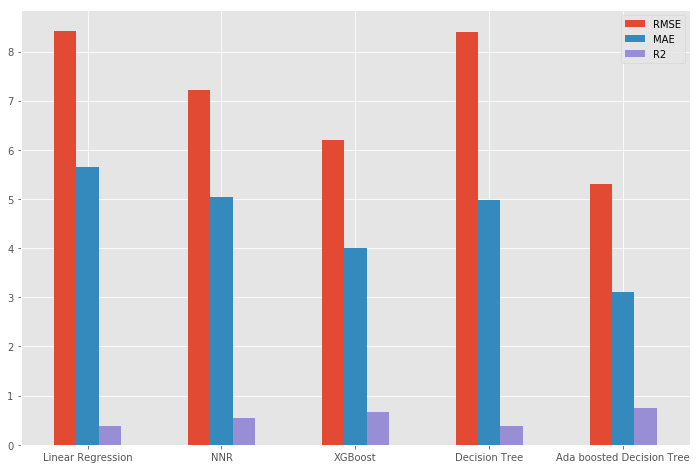

In [146]:
#Plot perfromance
plt.rcParams["figure.figsize"] = [12,8]
bar_df = pd.DataFrame({'RMSE': RMSE,'MAE': MAE,'R2':R2}, index=xlabels)
ax = bar_df.plot.bar(rot=0)

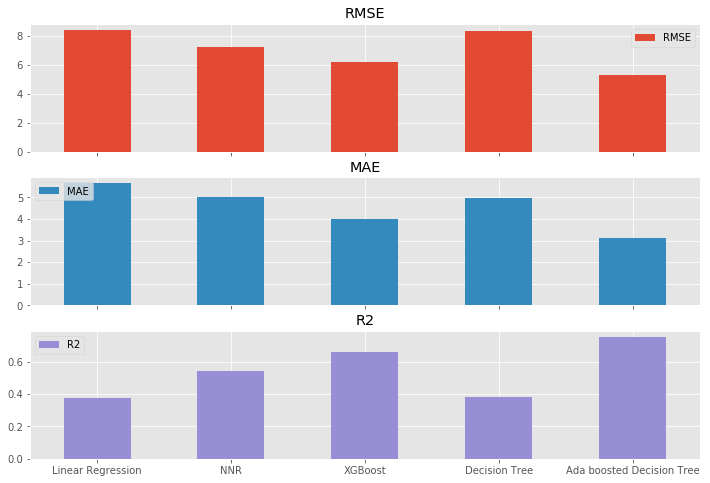

In [147]:
axes = bar_df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  

In [148]:
#DNN Regressor TensorFlow
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data = pd.read_csv('pred/final-noshift.csv')
# X will be a pandas dataframe of all columns except pm25
X = data[[col for col in data.columns if col != 'PM25']]

# y will be a pandas series of pm25
y = data['PM25']

In [3]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

In [5]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [ ]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

In [7]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [ ]:
evaluations = []
STEPS = 7000
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))